# **WINE QUALITY PROJECT - EXPLORATORY  DATA ANALYSIS**
### **By Angela Okafor**

#### Import required libraries

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import chardet 
import scipy.optimize as opt
from sklearn import preprocessing

print("Setup Complete!!!")

Setup Complete!!!


#### Read the file in

In [9]:
wine_path ="C:/Users/EBUBE/Downloads/winequality.csv"
winequality = pd.read_csv(wine_path)
print("Import Successful!!!")

Import Successful!!!


In [7]:
with open(wine_path, 'rb') as wine:
    result = chardet.detect(wine.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

#### Overview of the dataset

In [123]:
winequality.shape

(1599, 12)

In [124]:
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [125]:
winequality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [126]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [127]:
 winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [128]:
winequality.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [129]:
winequality.quality = winequality['quality'].astype('category')

In [130]:
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


* As seen above, the data set has no missing value

### **EFFECT OF EACH FEATURE ON THE WINE QUALITY**

#### Fixed Acidity

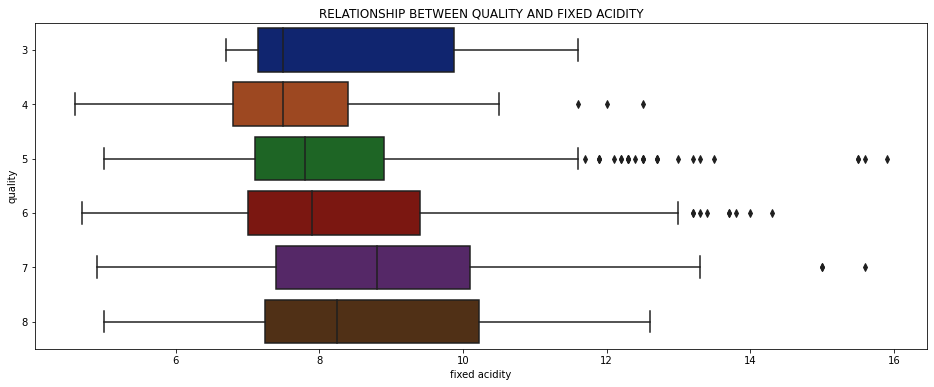

In [131]:
plt.figure(figsize = (16, 6))
sns.boxplot('fixed acidity', 'quality', data = winequality, palette = "dark")
plt.title("RELATIONSHIP BETWEEN QUALITY AND FIXED ACIDITY")
plt.show()

* Fixed acidity does not seem to have an effect on the quality of the wine

#### Volatile Acidity 

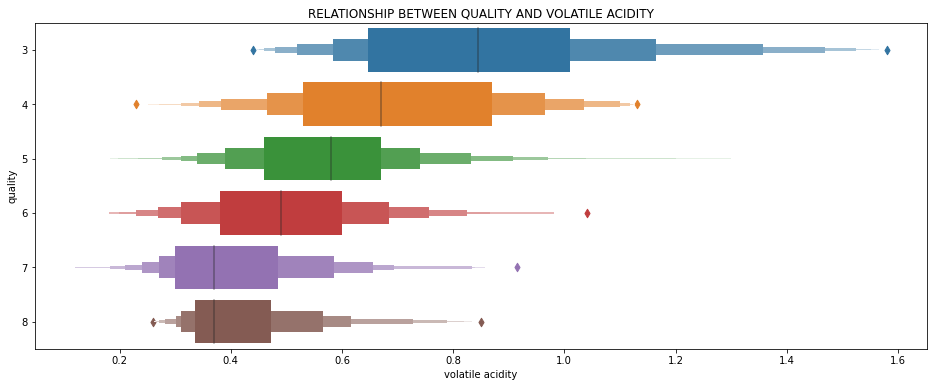

In [132]:
plt.figure(figsize = (16, 6))
sns.boxenplot('volatile acidity', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND VOLATILE ACIDITY")
plt.show()

* As seen above, the larger the volatile acidity the better the quality of the wine

#### Citric acid

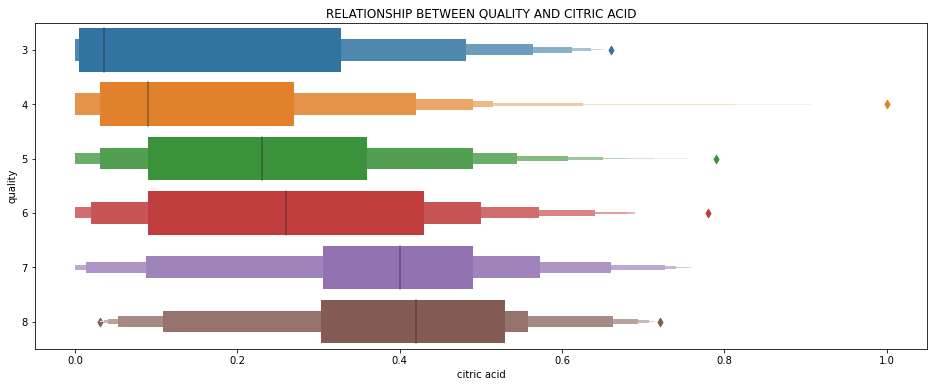

In [133]:
plt.figure(figsize = (16, 6))
sns.boxenplot('citric acid', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND CITRIC ACID")
plt.show()

* It can be observed from the chart above that the higheer the citric acid concentration, the better the quality of the wine

#### Reaidual Sugar

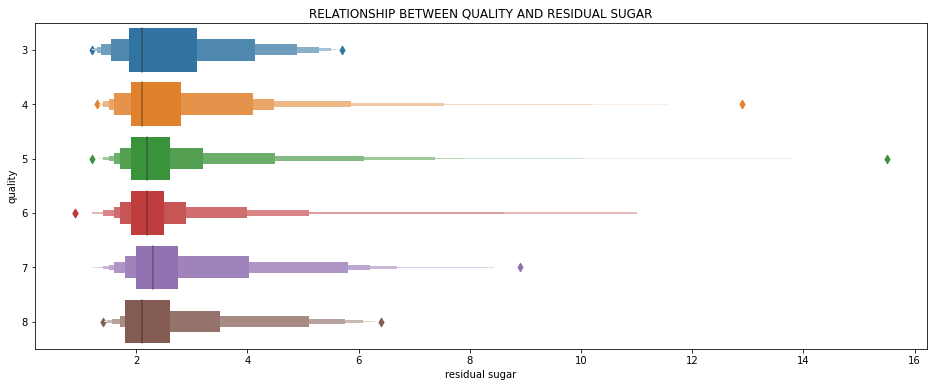

In [134]:
plt.figure(figsize = (16, 6))
sns.boxenplot('residual sugar', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND RESIDUAL SUGAR")
plt.show()

* Residual Sugar has no significant effect on the quality of the wine 

#### Chlorides

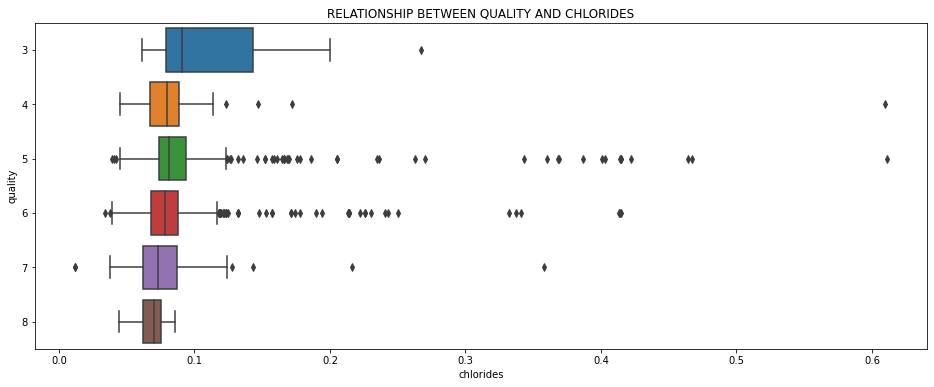

In [135]:
plt.figure(figsize = (16, 6))
sns.boxplot('chlorides', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND CHLORIDES")
plt.show()

* Chlorides concentrarion does not affect the quality of the wine

#### Free Sulfur Dioxide

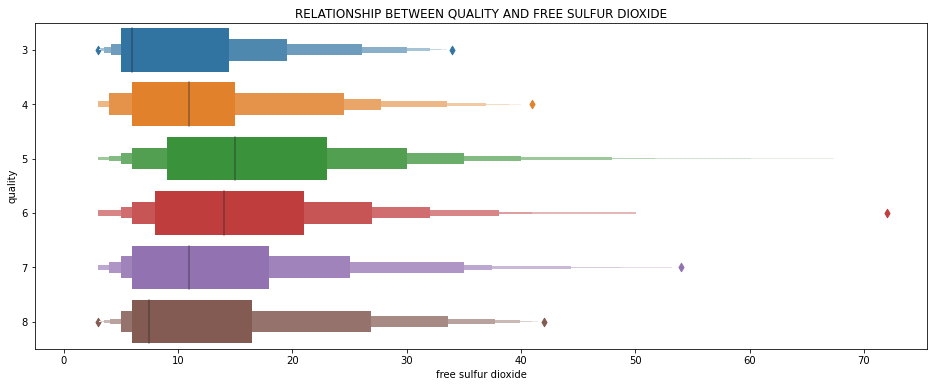

In [136]:
plt.figure(figsize = (16, 6))
sns.boxenplot('free sulfur dioxide', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND FREE SULFUR DIOXIDE")
plt.show()

* Free sulfur oxides have no effect on the quality of the wine 

#### Total Sulfur Dioxide

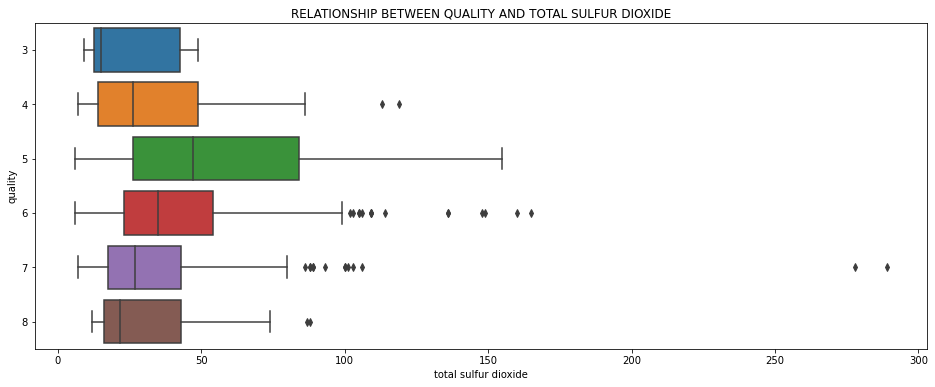

In [137]:
plt.figure(figsize = (16, 6))
sns.boxplot('total sulfur dioxide', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND TOTAL SULFUR DIOXIDE")
plt.show()

* Total sulfur dioxide does not affect the quality of the wine

#### Density

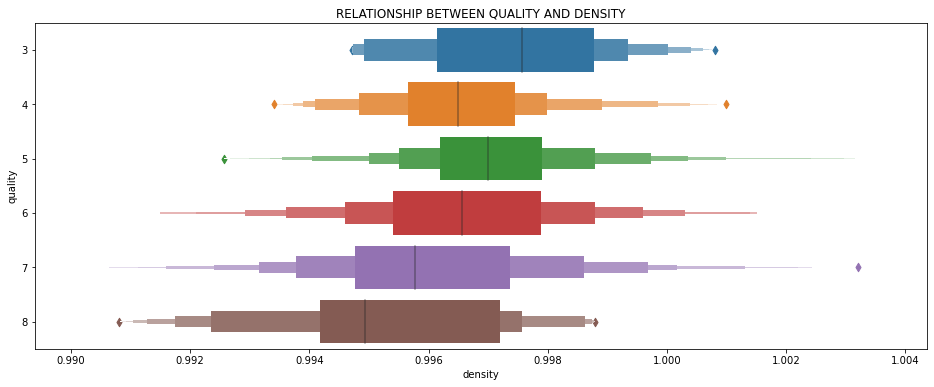

In [138]:
plt.figure(figsize = (16, 6))
sns.boxenplot('density', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND DENSITY")
plt.show()

* Generally, the lower the density, the higher the quality of the wine

#### pH

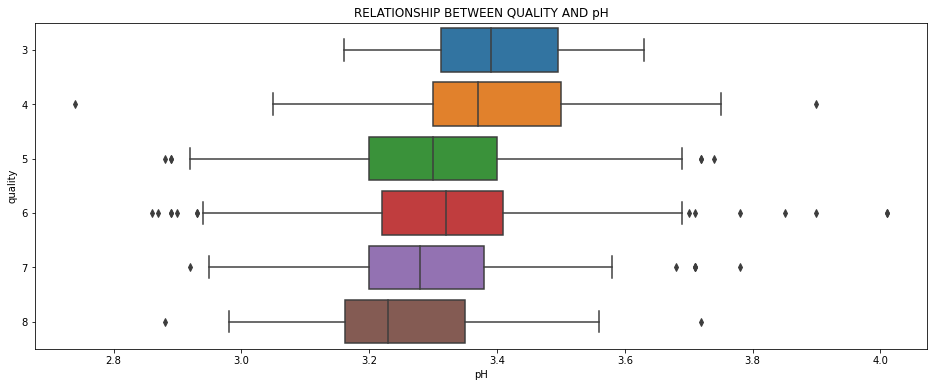

In [139]:
plt.figure(figsize = (16, 6))
sns.boxplot('pH', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND pH")
plt.show()

* Although, all the wines are acidic, the level of acidity varies with quality

### Sulphates

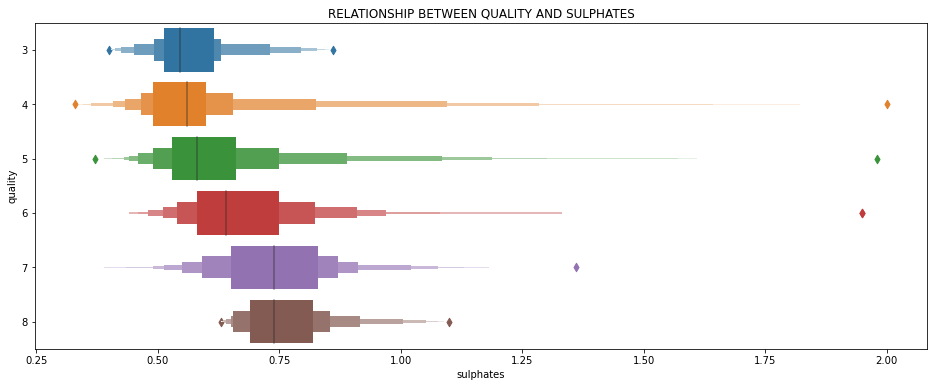

In [140]:
plt.figure(figsize = (16, 6))
sns.boxenplot('sulphates', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND SULPHATES")
plt.show()

* The higher the sulfates concentration, the higher the quality of the wine

### Alcohol

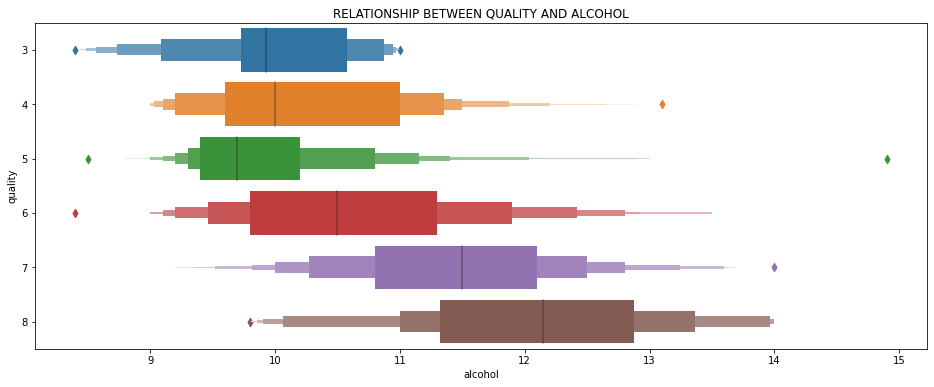

In [141]:
plt.figure(figsize = (16, 6))
sns.boxenplot('alcohol', 'quality', data = winequality)
plt.title("RELATIONSHIP BETWEEN QUALITY AND ALCOHOL")
plt.show()

* The higher the alcohol concentration the better the quality of the wine 

From my analysis, the features selected can be seen below:

* volatile acidity
* citric acid
* density
* pH
* sulphates
* alcohol

# **MODELLING**

### Data Preparation

In [142]:
wine_quality = winequality.copy()

In [143]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [144]:
wine_quality.drop(['residual sugar', 'chlorides', 'fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide'], axis = 1, inplace = True)

In [145]:
wine_quality.head()

,volatile acidity,citric acid,density,pH,sulphates,alcohol,quality
0,0.70,0.00,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,0.9980,3.16,0.58,9.8,6
4,0.70,0.00,0.9978,3.51,0.56,9.4,5


In [146]:
wine_quality.shape

(1599, 7)

## **DECISION TREES CLASSIFIER**

Convert the independent features into a numpy array

In [147]:
X = np.array(wine_quality[['volatile acidity', 'citric acid', 'density', 'pH', 'sulphates', 'alcohol']])#Independent
Y = np.array(wine_quality['quality'])#Target

In [148]:
X[0:5] 

array([[0.7   , 0.    , 0.9978, 3.51  , 0.56  , 9.4   ],
       [0.88  , 0.    , 0.9968, 3.2   , 0.68  , 9.8   ],
       [0.76  , 0.04  , 0.997 , 3.26  , 0.65  , 9.8   ],
       [0.28  , 0.56  , 0.998 , 3.16  , 0.58  , 9.8   ],
       [0.7   , 0.    , 0.9978, 3.51  , 0.56  , 9.4   ]])

In [149]:
Y[0:5]

array([5, 5, 5, 6, 5], dtype=int64)

Import train_test_split to split the dataset into training and testing sets

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

In [152]:
print("X train", x_train.shape)
print("X test", x_test.shape)
print("Y train", y_train.shape)
print("Y test", y_test.shape)

X train (1119, 6)
X test (480, 6)
Y train (1119,)
Y test (480,)


Building the Decision Trees Model

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [252]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth  = 15)
decision_tree

DecisionTreeClassifier(criterion='entropy', max_depth=15)

Fitting the dataset

In [253]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

### Prediction

In [254]:
y_predict = decision_tree.predict(x_test)

In [255]:
print("Predicted Values",y_predict[0:15])
print("Actual values",y_test[0:15])

Predicted Values [5 4 6 7 5 5 5 7 5 5 5 6 5 5 7]
Actual values [5 4 6 7 4 6 4 8 5 5 6 5 5 5 7]


### Model Evaluation

In [256]:
from sklearn import metrics
print("Accuracy score: ", metrics.accuracy_score(y_test, y_predict))

Accuracy score:  0.61875


The Decision tree model

In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.15      0.20      0.17        15
           5       0.64      0.73      0.68       202
           6       0.68      0.55      0.61       196
           7       0.61      0.64      0.63        59
           8       0.20      0.25      0.22         4

    accuracy                           0.62       480
   macro avg       0.38      0.40      0.38       480
weighted avg       0.63      0.62      0.62       480



#### Confusion Matrix

In [263]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0   2   2   0   0   0]
 [  0   3  10   1   1   0]
 [  3  11 147  38   3   0]
 [  0   4  64 108  19   1]
 [  0   0   7  11  38   3]
 [  0   0   1   1   1   1]]


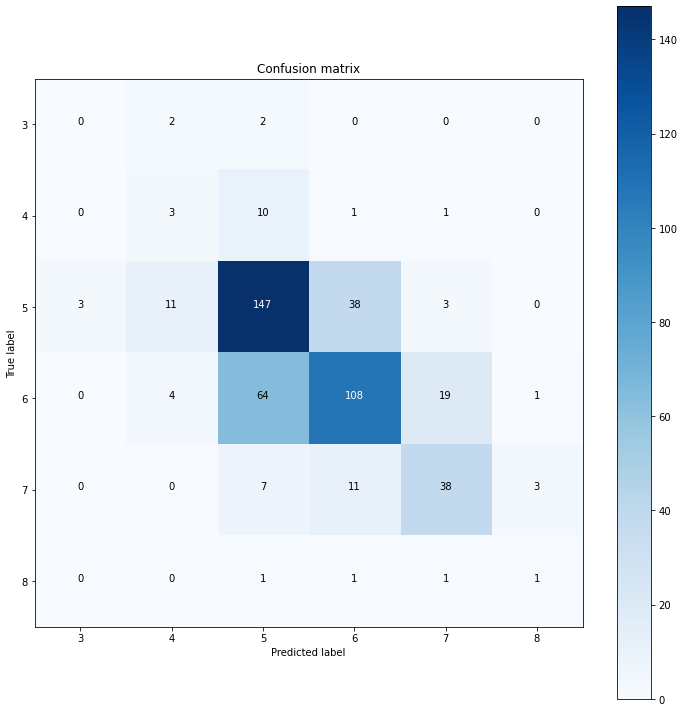

In [265]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[3,4,5,6,7,8])
np.set_printoptions(precision=2)

plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes=['3','4', '5','6', '7', '8' ],normalize= False,  title='Confusion matrix')
plt.show()

### F1 score

In [336]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average = "weighted")

0.618602585706753

### Jaccard Score

In [335]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict, average = "weighted")

0.45509141224217814

## **LOGISTIC REGRESSION**

In [163]:
from sklearn.linear_model import LogisticRegression

In [290]:
reg_model = LogisticRegression(C = 0.1, solver = 'newton-cg')
reg_model

LogisticRegression(C=0.1, solver='newton-cg')

In [291]:
reg_model.fit(x_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [292]:
reg_predict = reg_model.predict(x_test)

In [293]:
reg_predict

array([5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 5, 5, 7, 6, 6, 6, 6, 5, 6, 5, 6, 7, 5, 5, 6, 6, 5, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6,
       6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5,
       5, 6, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6,
       6, 5, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 7, 6, 6,

### Probability of Prediction

In [341]:
reg_prob = reg_model.predict_proba(x_test)
reg_prob

array([[0.01, 0.03, 0.63, 0.3 , 0.04, 0.  ],
       [0.01, 0.04, 0.44, 0.4 , 0.1 , 0.01],
       [0.01, 0.05, 0.18, 0.54, 0.2 , 0.03],
       ...,
       [0.01, 0.03, 0.29, 0.5 , 0.16, 0.01],
       [0.01, 0.04, 0.58, 0.32, 0.05, 0.  ],
       [0.01, 0.03, 0.24, 0.51, 0.2 , 0.02]])

#### Classification Report

In [295]:
from sklearn.metrics import classification_report
print(classification_report(y_test, reg_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        15
           5       0.61      0.80      0.69       202
           6       0.53      0.55      0.54       196
           7       0.53      0.14      0.22        59
           8       0.00      0.00      0.00         4

    accuracy                           0.58       480
   macro avg       0.28      0.25      0.24       480
weighted avg       0.54      0.58      0.54       480



#### Confusion matrix

In [296]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0   0   3   1   0   0]
 [  0   0  10   5   0   0]
 [  0   0 161  41   0   0]
 [  0   0  82 108   6   0]
 [  0   0   6  45   8   0]
 [  0   0   0   3   1   0]]


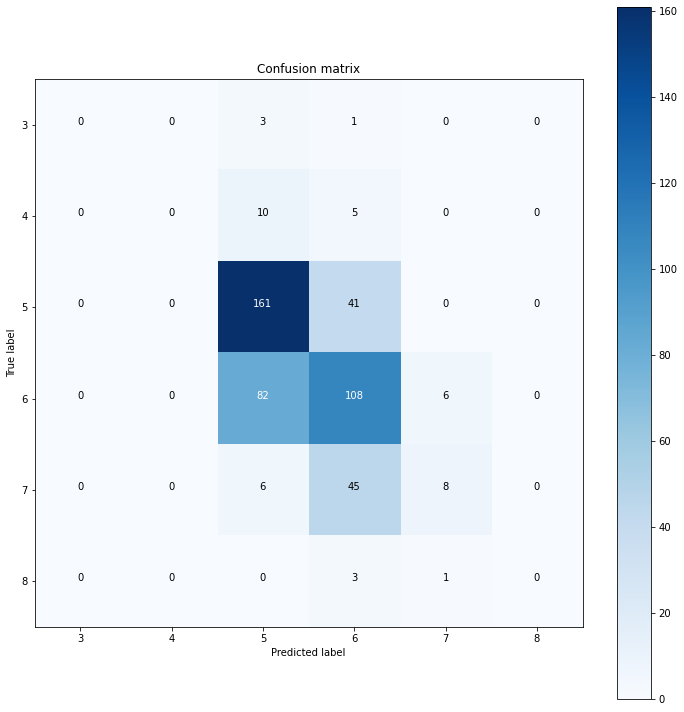

In [297]:
cnf_matrix = confusion_matrix(y_test, reg_predict, labels=[3,4,5,6,7,8])
np.set_printoptions(precision=2)

plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes=['3','4', '5','6', '7', '8' ],normalize= False,  title='Confusion matrix')
plt.show()

### Accuracy score

In [337]:
from sklearn import metrics
print("Accuracy score: ", metrics.accuracy_score(y_test, reg_predict))

Accuracy score:  0.5770833333333333


### F1 score

In [333]:
from sklearn.metrics import f1_score
f1_score(y_test, reg_predict, average = "weighted")

0.5396730299946044

### Jaccard score

In [334]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, reg_predict, average = "weighted")

0.39005649276267834

## **SUPPORT VECTOR MACHINE**

In [300]:
from sklearn import svm

In [320]:
svm_model = svm.SVC(kernel = "linear")
svm_model

SVC(kernel='linear')

In [321]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [322]:
svm_predict = svm_model.predict(x_test)

In [323]:
svm_predict

array([5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6,
       6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6,
       6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6,
       6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6,
       6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6,

### Classification Report

In [324]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        15
           5       0.60      0.80      0.68       202
           6       0.51      0.54      0.52       196
           7       0.00      0.00      0.00        59
           8       0.00      0.00      0.00         4

    accuracy                           0.56       480
   macro avg       0.18      0.22      0.20       480
weighted avg       0.46      0.56      0.50       480



### Confusion Matrix

In [325]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0   0   4   0   0   0]
 [  0   0  11   4   0   0]
 [  0   0 162  40   0   0]
 [  0   0  90 106   0   0]
 [  0   0   5  54   0   0]
 [  0   0   0   4   0   0]]


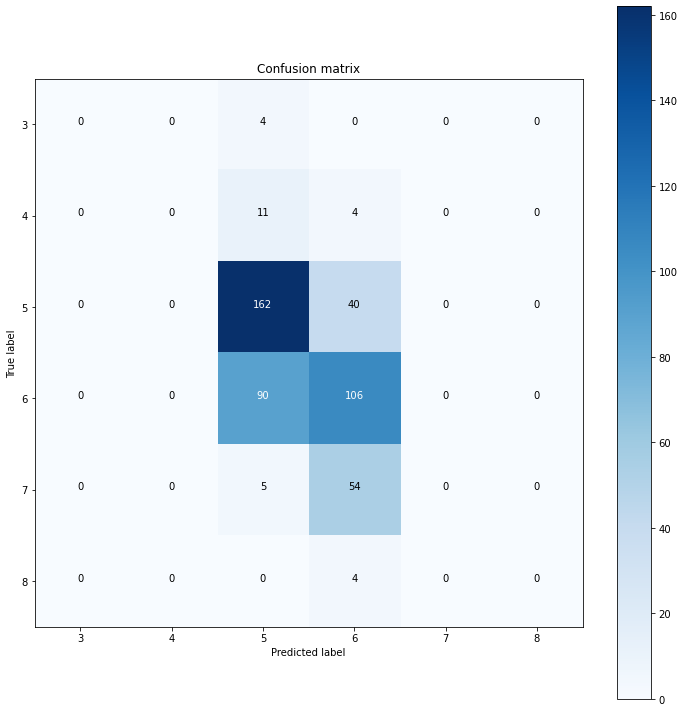

In [327]:
cnf_matrix = confusion_matrix(y_test, svm_predict, labels=[3,4,5,6,7,8])
np.set_printoptions(precision=2)

plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes=['3','4', '5','6', '7', '8' ],normalize= False,  title='Confusion matrix')
plt.show()

### Accuracy score

In [339]:
from sklearn import metrics
print("Accuracy score: ", metrics.accuracy_score(y_test, svm_predict))

Accuracy score:  0.5583333333333333


### F1 score

In [330]:
from sklearn.metrics import f1_score
f1_score(y_test, svm_predict, average = "weighted")

0.5019321552408406

### Jaccard score

In [342]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, svm_predict, average = "weighted")

0.3637557003958011

The best model was **DECISION TREE CLASSIFIER** because it has the best accuracy score, F1- score and Jaccard Score